In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline
import csv
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
data_frame = pd.read_csv('AccidentLondonBoroughs2223.csv')

In [3]:
data_frame.head

<bound method NDFrame.head of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       200501BS00001                 525680                  178240   
1       200501BS00002                 524170                  181650   
2       200501BS00003                 524520                  182240   
3       200501BS00004                 526900                  177530   
4       200501BS00005                 528060                  179040   
...               ...                    ...                     ...   
145217  201001ZT80435                 525680                  163130   
145218  201001ZT80436                 528610                  164760   
145219  201001ZT80444                 523860                  161100   
145220  201001ZT80445                 524620                  165430   
145221  201001ZT89417                 528230                  167150   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.191170  51.489096            

The raw data is seen up there is the presentation of raw data

Filtering the data according to (Local Authority (Highway) E09000001]	 and  Borough Name:	City of London)

In [4]:
column_name_to_filter = 'Local_Authority_Highway'
defined_value = 'E09000001'

# Use boolean indexing to filter rows based on the specified string value in the specified column
filtered_df = data_frame[data_frame[column_name_to_filter] == defined_value]
df=pd.DataFrame(filtered_df)
df.head

<bound method NDFrame.head of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
742     200501CP00001                 533230                  181490   
743     200501CP00002                 533740                  180550   
744     200501CP00003                 533230                  181500   
745     200501CP00004                 531750                  180830   
746     200501CP00005                 532930                  181500   
...               ...                    ...                     ...   
127007  201001HT20829                 533760                  181230   
127029  201001HT20857                 533840                  180890   
131847  201001MM70780                 533630                  180170   
137220  201001TA00322                 533830                  180780   
137273  201001TA00400                 532640                  180760   

        Longitude   Latitude  Police_Force  Accident_Severity  \
742     -0.081260  51.516575            

While the data is now filtered the huge size of the data frame has now become so compact , against the huge size of (145222 x 32) rether now its only(1983 x 32)

# Task 1. Business Understanding  

A. -The data is based on accidents happend throughout LONDON.The data seems to coming from survey from multiple departments including the traffic department ,police authority ,medical register ,road survey etc.

B. -The meaningful problems that potentially can be addressed by using analytics within business context are possible for the sectors to imply on are:

        1.  Transportation :                    to improve the safety measures and optimizing traffic flow .
        2.  law enforcement :                   in order to implement safety awareness campaign to the high frequency accident areas. 
        3.  Emergency service optimization   :  emergency medical services can be optimized throughout the highly frequent accident areas.
        4.  Geographic Information System   :   The inclusion of location, longitude, and LSOA data makes it suitable for GIS applications.
        Mapping tools can be used to visualize and analyze spatial patterns of accidents. 
        5.  Compliance and regulation   :       Insights from the data can inform the development or modification of safety regulations.

C. Translating the possible business problems to appropriate data mining problems and tasks are   : 
   1. Classification:             Predicting accident severity based on various factors. 
   2. Clustering:                 Identifying patterns or groups of accidents with similar characteristics. 
   3. Regression:                 Predicting the number of casualties or vehicles involved. 
   4. Association Rule Mining:    Discovering relationships between different attributes.

# Task 2. Data Understanding 

## A.

In [5]:
total_instances = df.shape[0]
print('Total number of Insances : ',total_instances)

Total number of Insances :  1983


In [6]:
total_number_of_attributes = df.shape[1]
print('Total number of Atributes : ',total_number_of_attributes)

Total number of Atributes :  32


In [7]:
data_type_of_each_attributes = df.dtypes
print('Type of each attributes are : ',data_type_of_each_attributes)

Type of each attributes are :  Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                       

In [8]:
basic_statistics_of_each_attribute = df.describe()
print('The basic statistics of each attribute : ',basic_statistics_of_each_attribute)

The basic statistics of each attribute :         Location_Easting_OSGR  Location_Northing_OSGR    Longitude  \
count            1983.000000             1983.000000  1983.000000   
mean           532531.931417           181183.388805    -0.091430   
std               709.060756              338.429646     0.010198   
min            530940.000000           180120.000000    -0.114204   
25%            531810.000000           180930.000000    -0.101829   
50%            532700.000000           181150.000000    -0.088901   
75%            533090.000000           181460.000000    -0.083362   
max            533840.000000           182080.000000    -0.072690   

          Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1983.000000        1983.0        1983.000000         1983.000000   
mean     51.513983          48.0           2.854261            1.645991   
std       0.003066           0.0           0.365573            0.554536   
min      51.504174          48.0    

In [9]:
value_range = df.select_dtypes(include=['number']).agg(['min', 'max'])
print('Value range : ',value_range)

Value range :       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
min                 530940                  180120  -0.114204  51.504174   
max                 533840                  182080  -0.072690  51.522147   

     Police_Force  Accident_Severity  Number_of_Vehicles  \
min            48                  1                   1   
max            48                  3                   4   

     Number_of_Casualties  Day_of_Week  Local_Authority_District  ...  \
min                     1            1                       570  ...   
max                    10            7                       570  ...   

     2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
min                0                                  0   
max             4208                                  2   

     Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
min                                        0                 1   
max                                        8 

In [10]:
average_value = df.select_dtypes(include=['number']).mean()
print('Average : ',average_value)

Average :  Location_Easting_OSGR                          532531.931417
Location_Northing_OSGR                         181183.388805
Longitude                                          -0.091430
Latitude                                           51.513983
Police_Force                                       48.000000
Accident_Severity                                   2.854261
Number_of_Vehicles                                  1.645991
Number_of_Casualties                                1.121029
Day_of_Week                                         4.104387
Local_Authority_District                          570.000000
1st_Road_Class                                      3.804337
1st_Road_Number                                   534.583459
Road_Type                                           5.001513
Speed_limit                                        29.989914
Junction_Detail                                     3.351992
Junction_Control                                    2.149269
2nd_Road_Clas

In [11]:
standard_deviation_values = df.select_dtypes(include=['number']).std()
print('Standard deviation value : ',standard_deviation_values)

Standard deviation value :  Location_Easting_OSGR                           709.060756
Location_Northing_OSGR                          338.429646
Longitude                                         0.010198
Latitude                                          0.003066
Police_Force                                      0.000000
Accident_Severity                                 0.365573
Number_of_Vehicles                                0.554536
Number_of_Casualties                              0.464129
Day_of_Week                                       1.655403
Local_Authority_District                          0.000000
1st_Road_Class                                    0.998001
1st_Road_Number                                1053.355001
Road_Type                                         1.588778
Speed_limit                                       0.550112
Junction_Detail                                   2.374850
Junction_Control                                  1.852783
2nd_Road_Class              

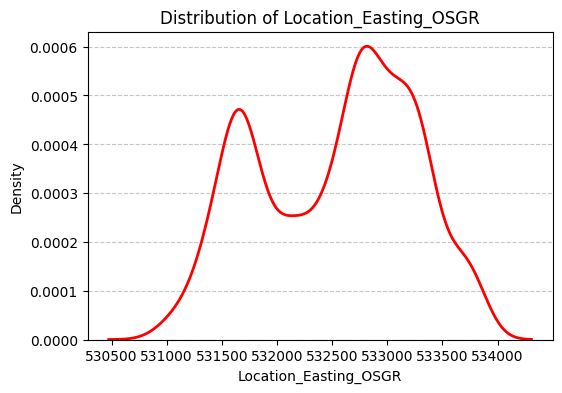

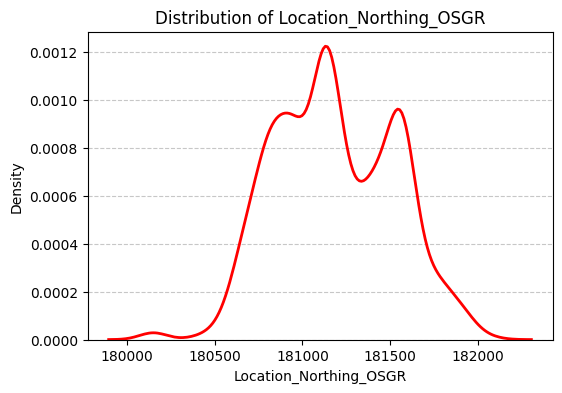

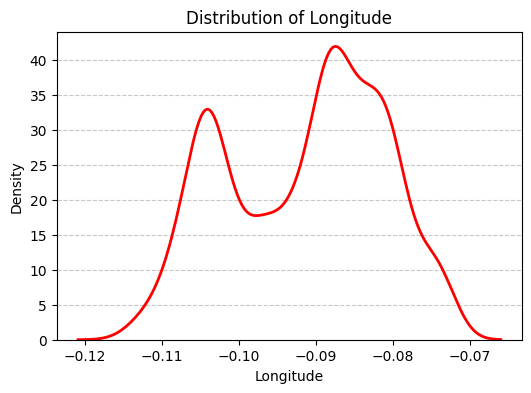

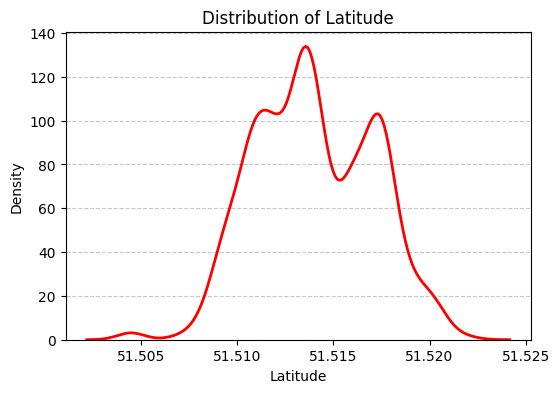

C:\Users\RABBI DURRANI\AppData\Local\Temp\ipykernel_13520\496483933.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], color='red', linewidth=2)


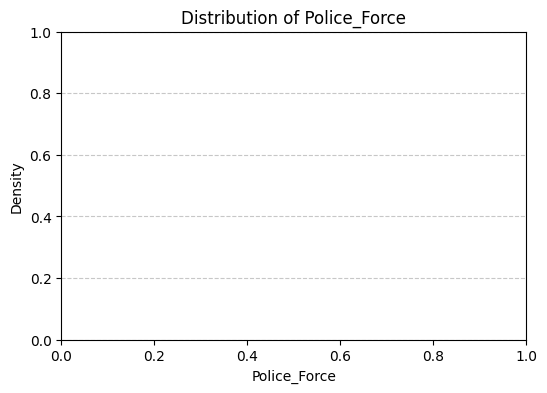

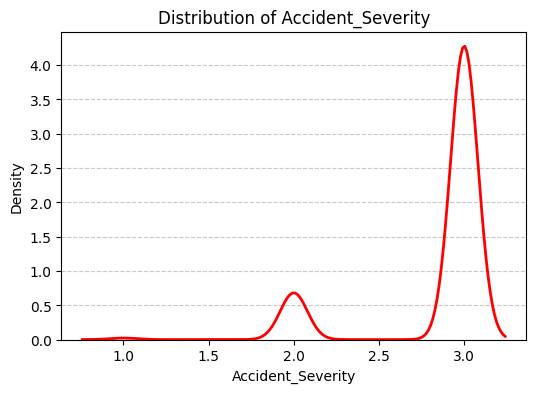

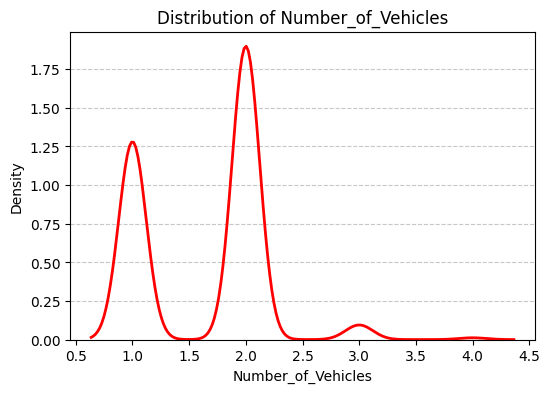

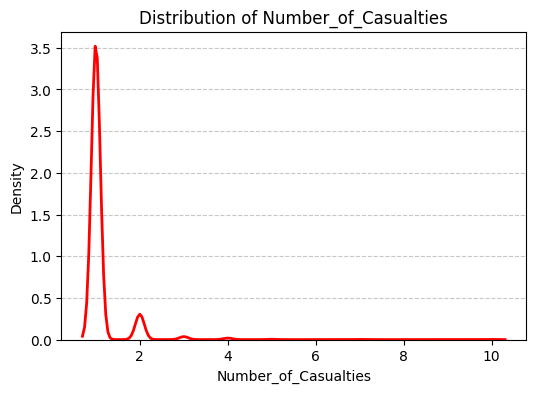

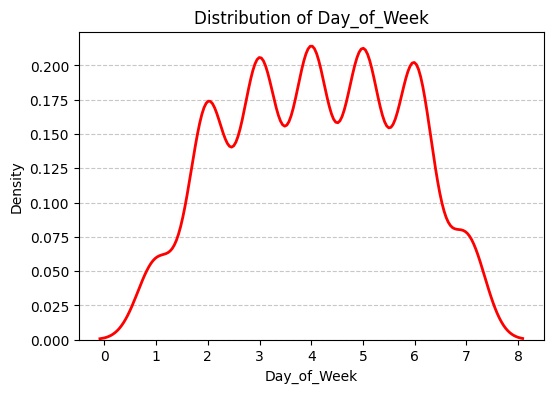

C:\Users\RABBI DURRANI\AppData\Local\Temp\ipykernel_13520\496483933.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], color='red', linewidth=2)


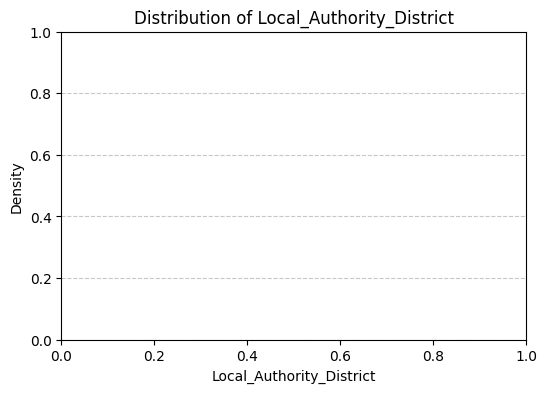

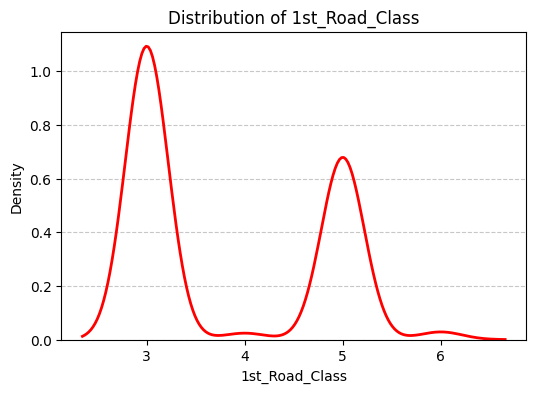

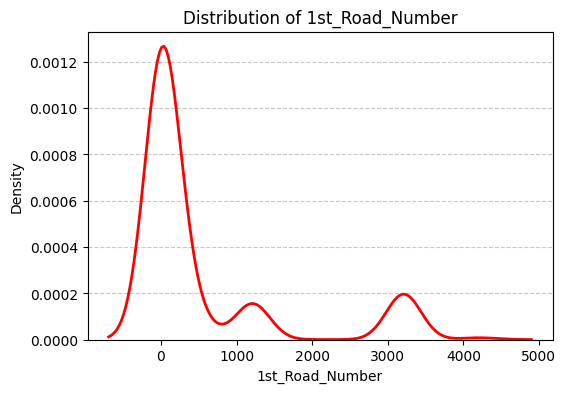

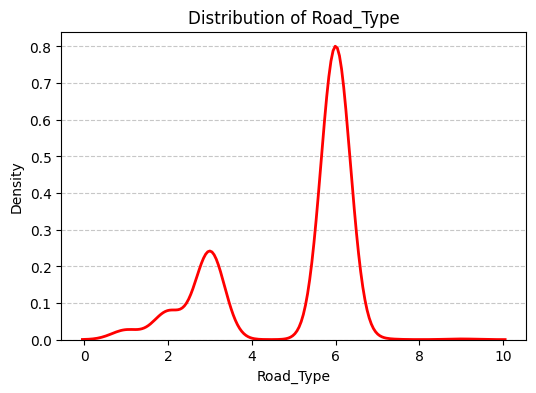

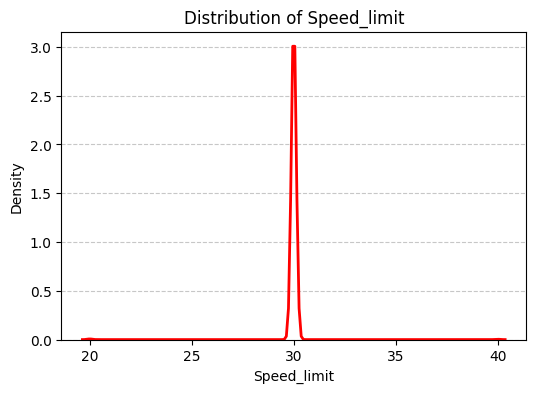

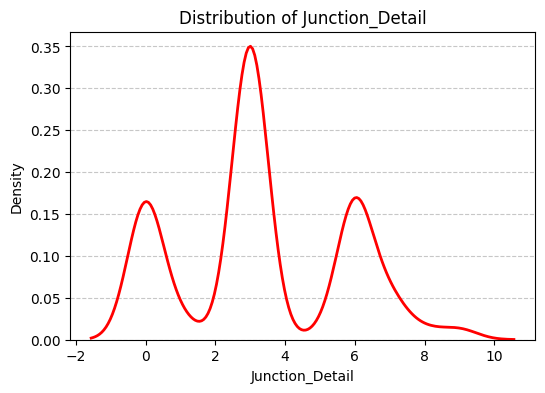

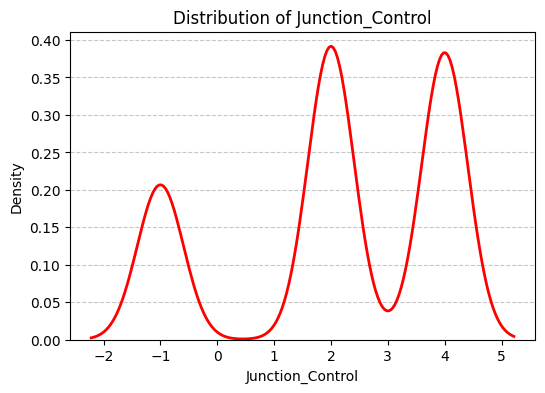

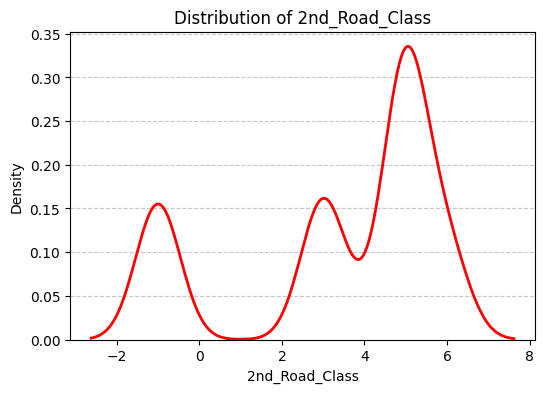

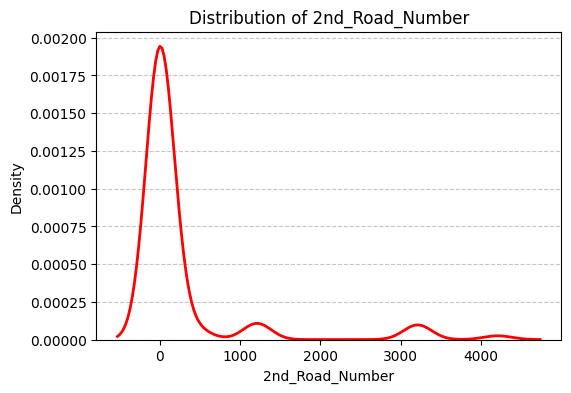

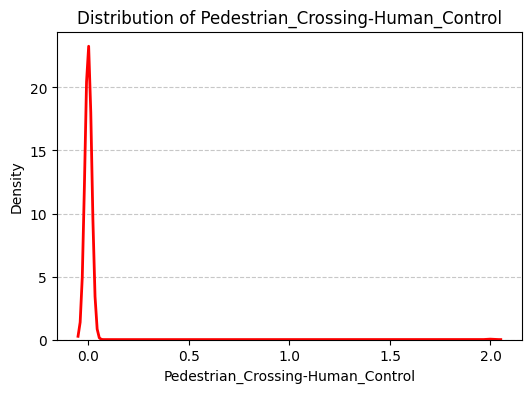

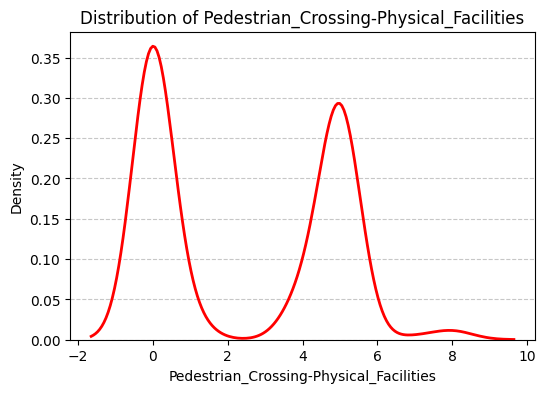

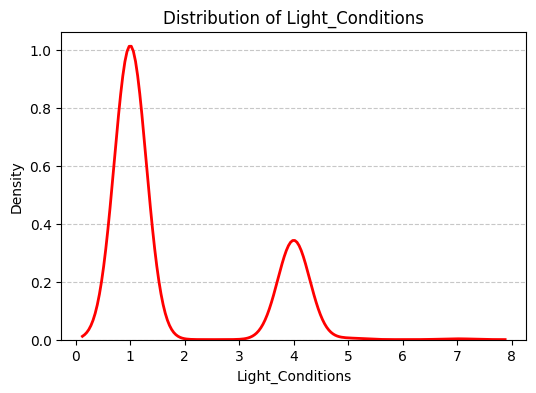

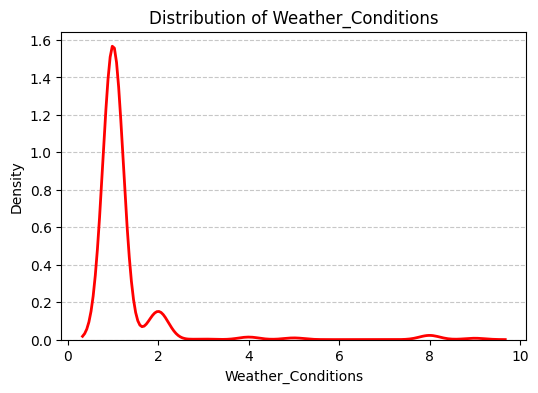

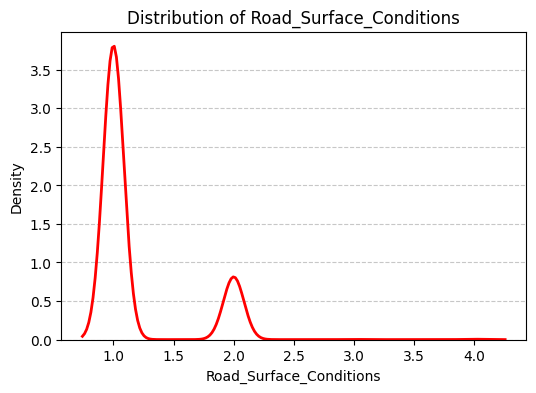

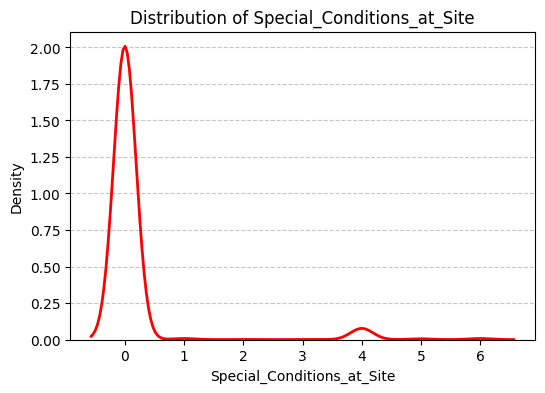

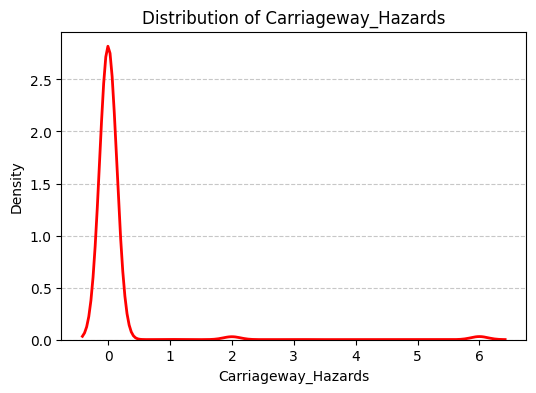

C:\Users\RABBI DURRANI\AppData\Local\Temp\ipykernel_13520\496483933.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], color='red', linewidth=2)


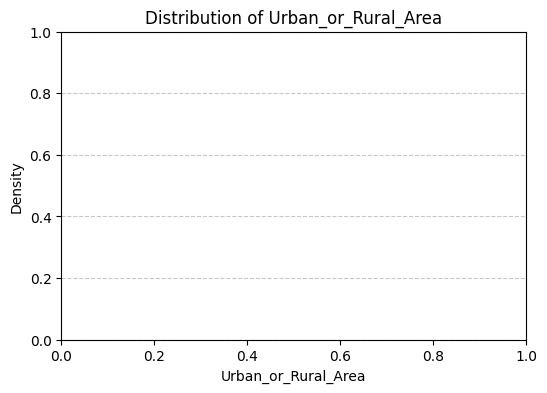

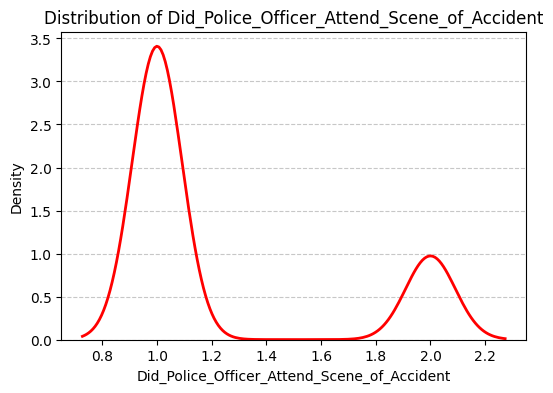

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot skewness for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[column], color='red', linewidth=2)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [13]:
kurtosis = df.select_dtypes(include=['number']).kurtosis()
print('Kurtosis : ',kurtosis)

Kurtosis :  Location_Easting_OSGR                           -1.060131
Location_Northing_OSGR                          -0.524016
Longitude                                       -1.066915
Latitude                                        -0.490353
Police_Force                                     0.000000
Accident_Severity                                4.121186
Number_of_Vehicles                              -0.012185
Number_of_Casualties                            92.938671
Day_of_Week                                     -0.983083
Local_Authority_District                         0.000000
1st_Road_Class                                  -1.613870
1st_Road_Number                                  2.472759
Road_Type                                       -0.544579
Speed_limit                                    328.109355
Junction_Detail                                 -0.781023
Junction_Control                                -0.853424
2nd_Road_Class                                  -0.602381
2n

In [14]:
column_modes = df.mode().iloc[0]
print('Column modes : ',column_modes)

Column modes :  Accident_Index                                 200501CP00001
Location_Easting_OSGR                               531640.0
Location_Northing_OSGR                              181170.0
Longitude                                           -0.10061
Latitude                                           51.515721
Police_Force                                            48.0
Accident_Severity                                        3.0
Number_of_Vehicles                                       2.0
Number_of_Casualties                                     1.0
Date                                              06/05/2008
Day_of_Week                                              4.0
Time                                                   08:30
Local_Authority_District                               570.0
Local_Authority_Highway                            E09000001
1st_Road_Class                                           3.0
1st_Road_Number                                          0.0
Road_Typ

## B

The columns are not mentioned here ,they have been given a glance ,but no null values were found.

Finding columns with null values

In [15]:
column_name= 'LSOA_of_Accident_Location'
missing_values_column = df[column_name].isnull()
missing_count_column = missing_values_column.sum()
print(f"Missing values count for {column_name}: {missing_count_column}")

Missing values count for LSOA_of_Accident_Location: 10


Locating the outliers

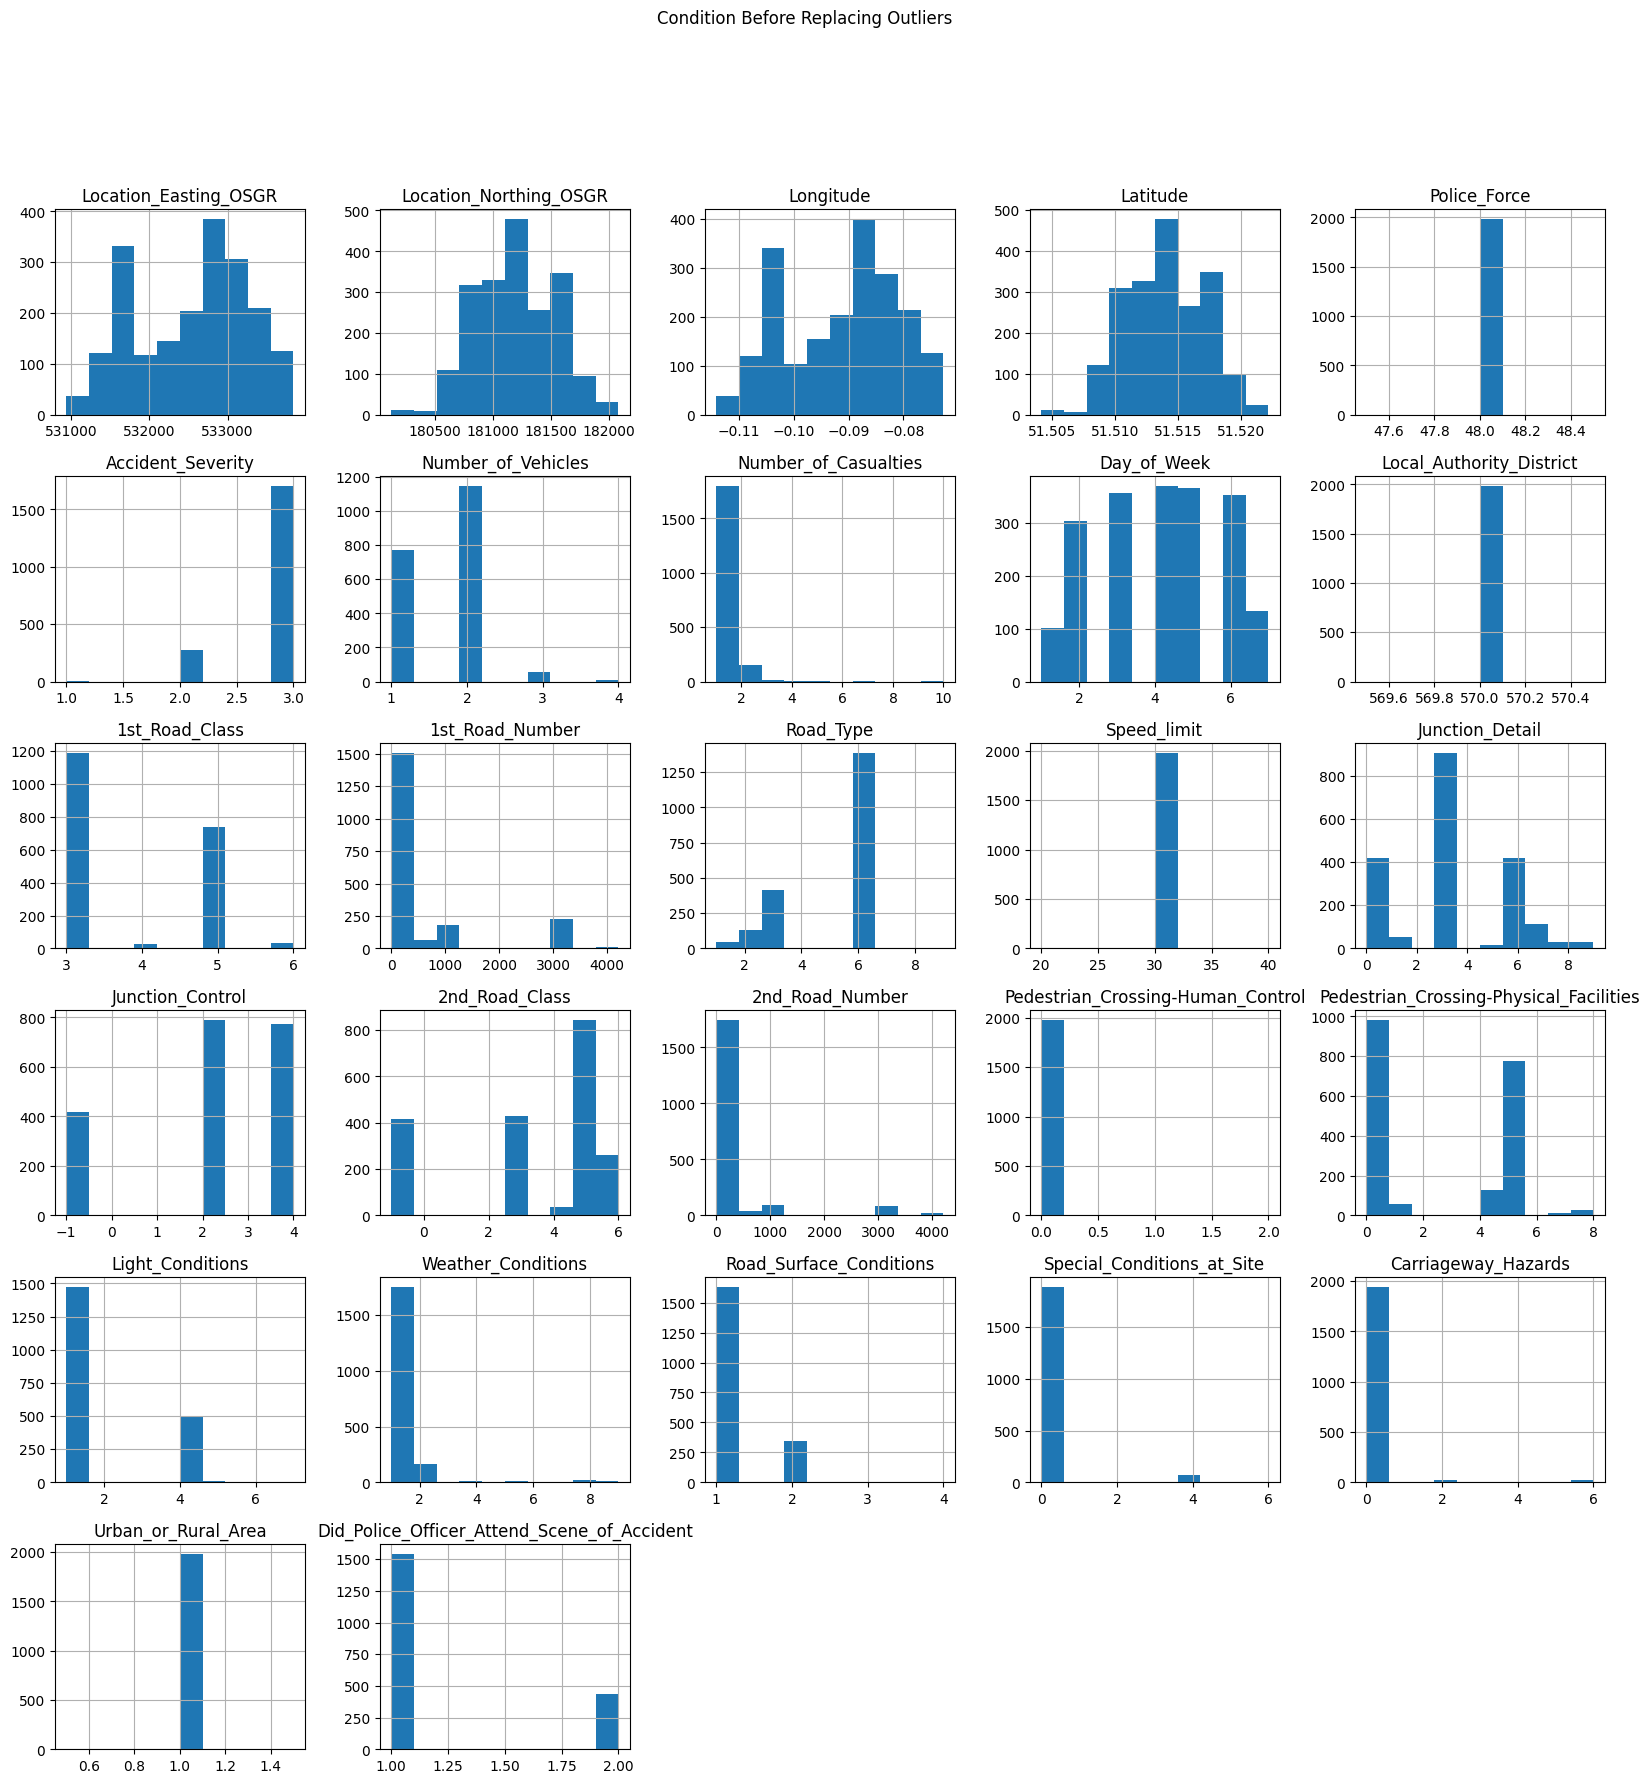

In [16]:
df.hist(figsize=(20, 20))
plt.suptitle('Condition Before Replacing Outliers')
plt.show()

Finding out the extreme values

In [17]:
def get_extreme_values(column):
    column_numeric = pd.to_numeric(column, errors='coerce')
    if not hasattr(column_numeric, 'isnull') or column_numeric.isnull().all():
        return pd.DataFrame()

    Q1 = column_numeric.quantile(0.25)
    Q3 = column_numeric.quantile(0.75)
    IQR = Q3 - Q1

    extreme_mask = (column_numeric < Q1 - 1.5 * IQR) | (column_numeric > Q3 + 1.5 * IQR)
    
    return pd.DataFrame({'Value': column[extreme_mask], 'Column': column.name})


extreme_values_dfs = [get_extreme_values(df[col]) for col in df.columns]

extreme_values_df = pd.concat(extreme_values_dfs, ignore_index=True)

print(extreme_values_df)

              Value                                       Column
0     180130.000000                       Location_Northing_OSGR
1     180120.000000                       Location_Northing_OSGR
2     180130.000000                       Location_Northing_OSGR
3         51.504439                                     Latitude
4         51.504261                                     Latitude
...             ...                                          ...
2933       2.000000  Did_Police_Officer_Attend_Scene_of_Accident
2934       2.000000  Did_Police_Officer_Attend_Scene_of_Accident
2935       2.000000  Did_Police_Officer_Attend_Scene_of_Accident
2936       2.000000  Did_Police_Officer_Attend_Scene_of_Accident
2937       2.000000  Did_Police_Officer_Attend_Scene_of_Accident

[2938 rows x 2 columns]


Here's the incomparable value ranges of variables.

In [18]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_ranges = df[numerical_cols].agg(['min', 'max'])
categorical_values = df[categorical_cols].apply(lambda x: set(x))

print("Numerical Ranges:")
print(numerical_ranges)
print("\nCategorical Values:")
print(categorical_values)

Numerical Ranges:
     Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
min                 530940                  180120  -0.114204  51.504174   
max                 533840                  182080  -0.072690  51.522147   

     Police_Force  Accident_Severity  Number_of_Vehicles  \
min            48                  1                   1   
max            48                  3                   4   

     Number_of_Casualties  Day_of_Week  Local_Authority_District  ...  \
min                     1            1                       570  ...   
max                    10            7                       570  ...   

     2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
min                0                                  0   
max             4208                                  2   

     Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
min                                        0                 1   
max                                       

The imbalanced classes are identifyed bellow:

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        class_distribution = df[column].value_counts()
        
        imbalance_threshold = 0.05
        imbalanced_classes = class_distribution[class_distribution / len(df) < imbalance_threshold].index
        
        print(f"Column: {column}")
        print(f"Imbalanced classes: {imbalanced_classes}")
        print()

Column: Accident_Index
Imbalanced classes: Index(['200501CP00001', '200801CW12047', '200801CW11219', '200801CW10878',
       '200801CP00338', '200801CP00337', '200801CP00336', '200801CP00335',
       '200801CP00334', '200801CP00332',
       ...
       '200601EO41278', '200601EO40816', '200601EO40681', '200601EO40447',
       '200601EO40429', '200601EO40328', '200601EO40275', '200601EO40221',
       '200601CP09009', '201001TA00400'],
      dtype='object', name='Accident_Index', length=1983)

Column: Date
Imbalanced classes: Index(['16/12/2008', '06/05/2008', '09/08/2010', '03/08/2005', '20/09/2006',
       '25/08/2005', '28/11/2007', '24/09/2008', '30/07/2008', '08/12/2009',
       ...
       '12/06/2007', '10/06/2007', '18/06/2007', '20/06/2007', '23/06/2007',
       '27/06/2007', '26/06/2007', '04/07/2007', '05/07/2007', '03/10/2010'],
      dtype='object', name='Date', length=1229)

Column: Time
Imbalanced classes: Index(['08:30', '09:00', '08:55', '08:45', '09:15', '17:30', '08:40',

# Task 3. Data Preparation 

## A

Replacing the missing values of the column with the corresponding values

In [20]:
column_name= 'LSOA_of_Accident_Location'
df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0])

In [21]:
column_name= 'LSOA_of_Accident_Location'
missing_values_column = df[column_name].isnull()
missing_count_column = missing_values_column.sum()
print(f"Missing values count for {column_name}: {missing_count_column}")

Missing values count for LSOA_of_Accident_Location: 0


As can be seen the column which was showing containing 10 null values is now showing 0 null values .The null values has been replaced with most frequent values.

Tackling the outliers

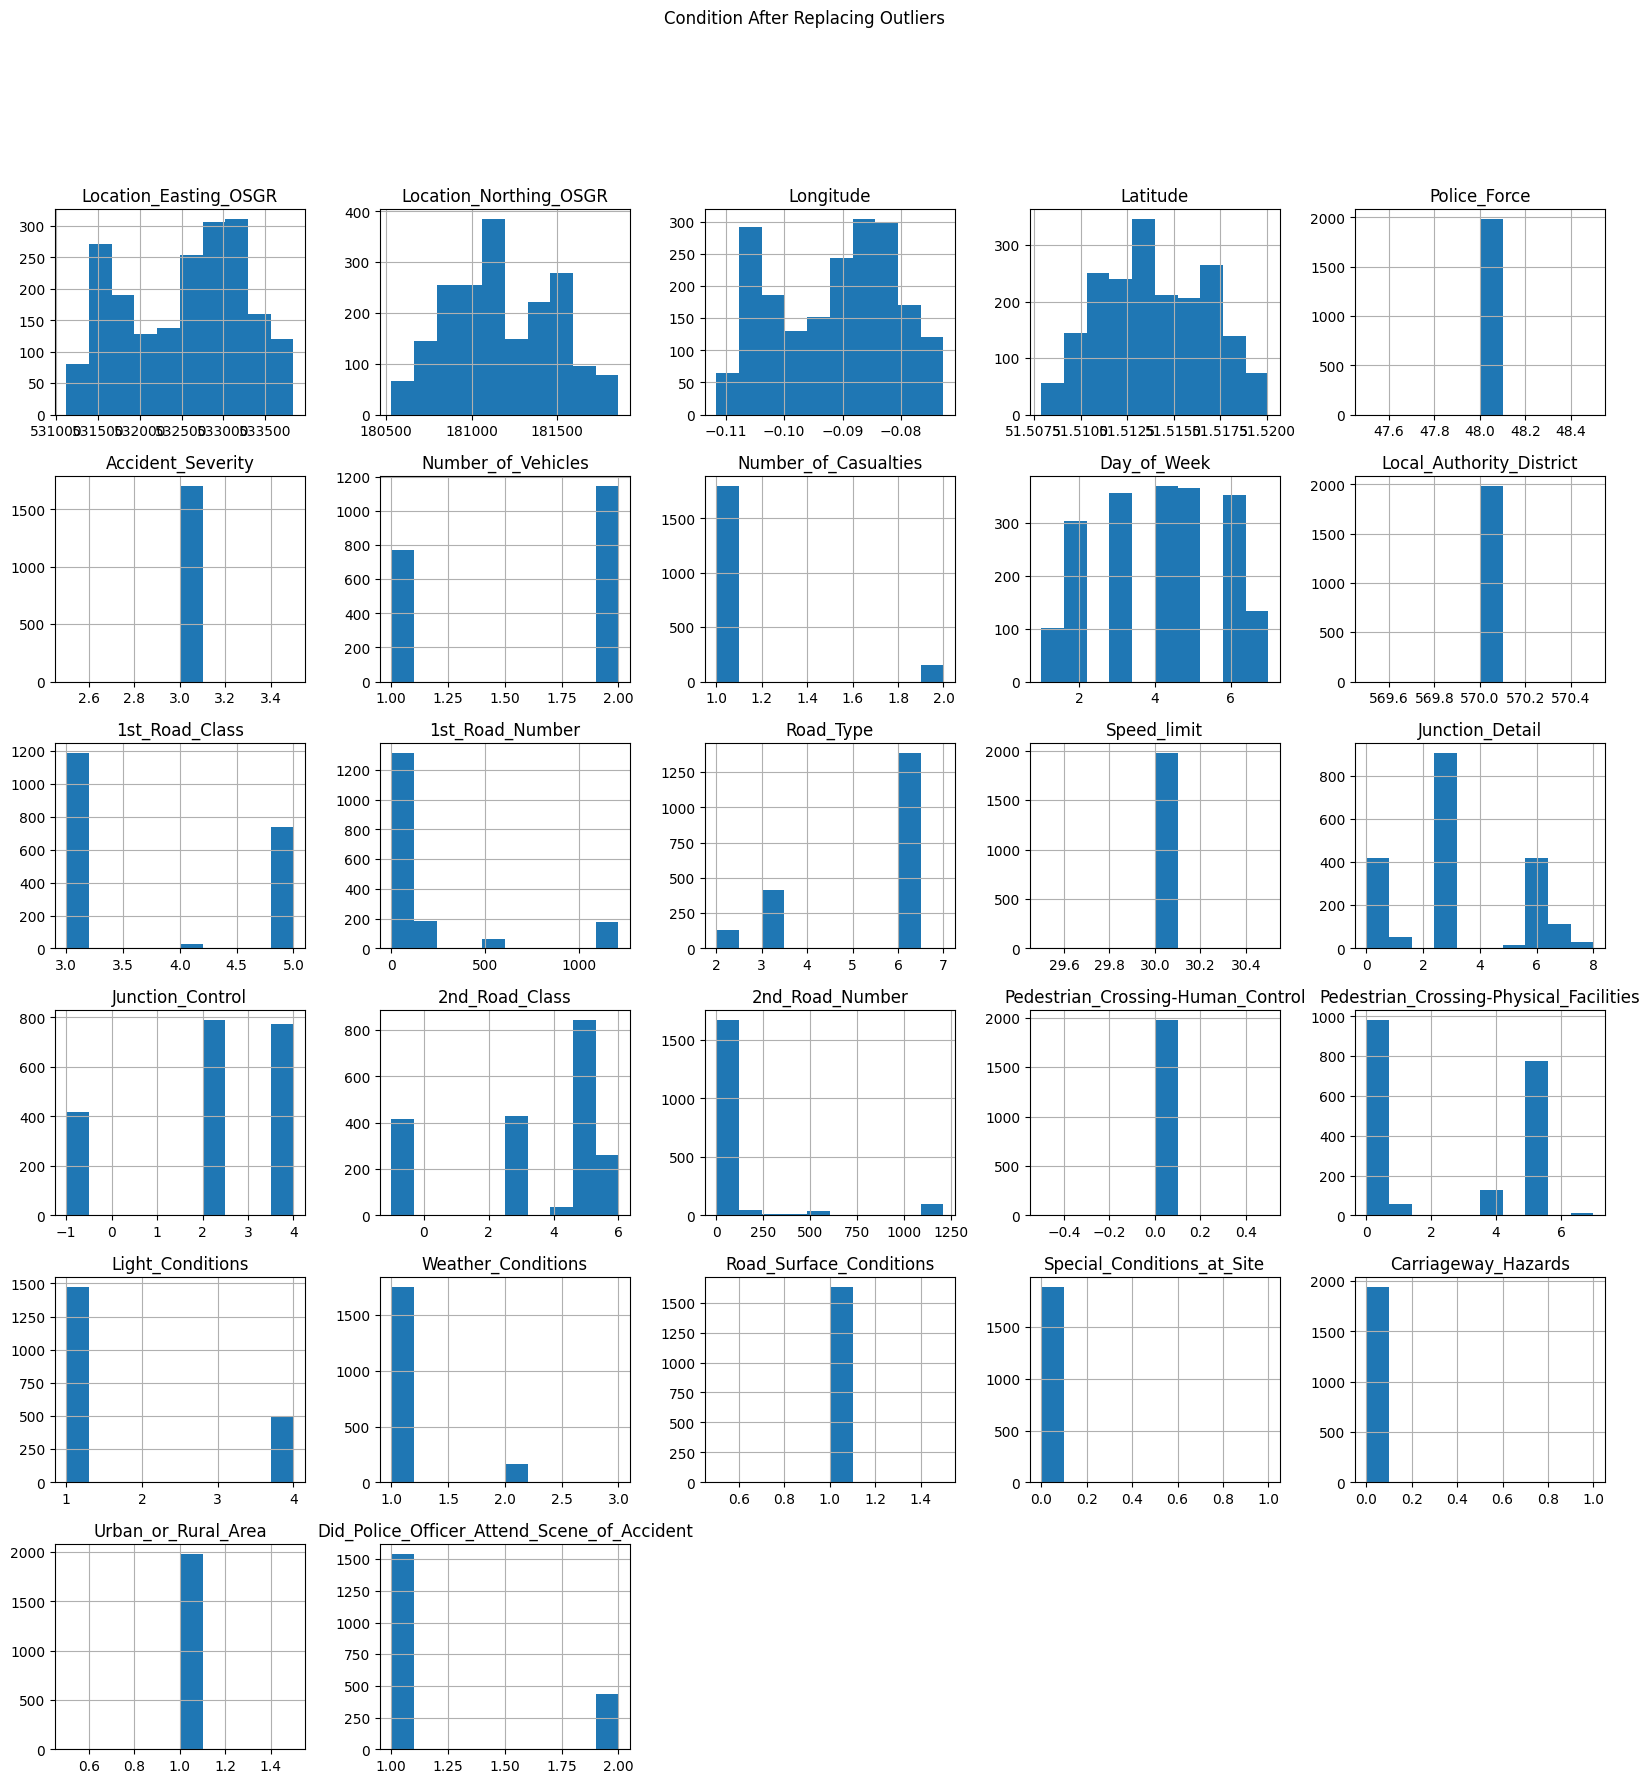

In [22]:
def replace_outliers(df, threshold=2):
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            mean = df[column].mean()
            std = df[column].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
            outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
            df.loc[outliers, column] = np.nan

replace_outliers(df)

df.hist(figsize=(20, 20))
plt.suptitle('Condition After Replacing Outliers')
plt.show()

Replacing all the extreme values from the Data Frame with the its corresponding type such as :int,float,string with int,float,string. 

In [23]:
def replace_extreme_values(column):
    column_numeric = pd.to_numeric(column, errors='coerce')
    if column_numeric.isnull().all():
        return column

    Q1 = column_numeric.quantile(0.25)
    Q3 = column_numeric.quantile(0.75)
    IQR = Q3 - Q1

    new_value = column_numeric.median()
    new_value = new_value.astype(column_numeric.dtype)

    replacements = np.where((column_numeric < Q1 - 1.5 * IQR) | (column_numeric > Q3 + 1.5 * IQR), new_value, column)

    # Print information about the replacement
    num_replacements = np.sum(replacements != column)
    print(f"Replaced {num_replacements} extreme values in column {column.name}")

    return replacements

# Assuming df is your DataFrame
df = df.apply(replace_extreme_values)
df.to_csv('modified_file.csv', index=False)


Replaced 21 extreme values in column Location_Easting_OSGR
Replaced 53 extreme values in column Location_Northing_OSGR
Replaced 22 extreme values in column Longitude
Replaced 52 extreme values in column Latitude
Replaced 0 extreme values in column Police_Force
Replaced 280 extreme values in column Accident_Severity
Replaced 64 extreme values in column Number_of_Vehicles
Replaced 185 extreme values in column Number_of_Casualties
Replaced 0 extreme values in column Day_of_Week
Replaced 0 extreme values in column Local_Authority_District
Replaced 31 extreme values in column 1st_Road_Class
Replaced 488 extreme values in column 1st_Road_Number
Replaced 48 extreme values in column Road_Type
Replaced 6 extreme values in column Speed_limit
Replaced 31 extreme values in column Junction_Detail
Replaced 0 extreme values in column Junction_Control
Replaced 417 extreme values in column 2nd_Road_Class
Replaced 462 extreme values in column 2nd_Road_Number
Replaced 3 extreme values in column Pedestria

Changing category

In [24]:
categorical_columns=['Police_Force', 'Accident_Severity', 
                     'Day_of_Week', 'Local_Authority_Highway', '1st_Road_Class', 
                     'Road_Type', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
                     'Pedestrian_Crossing-Human_Control', 
                     'Pedestrian_Crossing-Physical_Facilities', 
                     'Light_Conditions', 'Weather_Conditions', 
                     'Road_Surface_Conditions', 
                     'Special_Conditions_at_Site', 'Carriageway_Hazards',
                     'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']
for col in categorical_columns:
    df[col]=df[col].astype('category')
df['Data'] = pd.to_datetime(df['Date'], format ='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format ='%H:%M').dt.time
print(df.dtypes)

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                         category
Accident_Severity                                    category
Number_of_Vehicles                                    float64
Number_of_Casualties                                  float64
Date                                                   object
Day_of_Week                                          category
Time                                                   object
Local_Authority_District                              float64
Local_Authority_Highway                              category
1st_Road_Class                                       category
1st_Road_Number                                       float64
Road_Typ

## B

•	Identify co-relations among certain variables. 

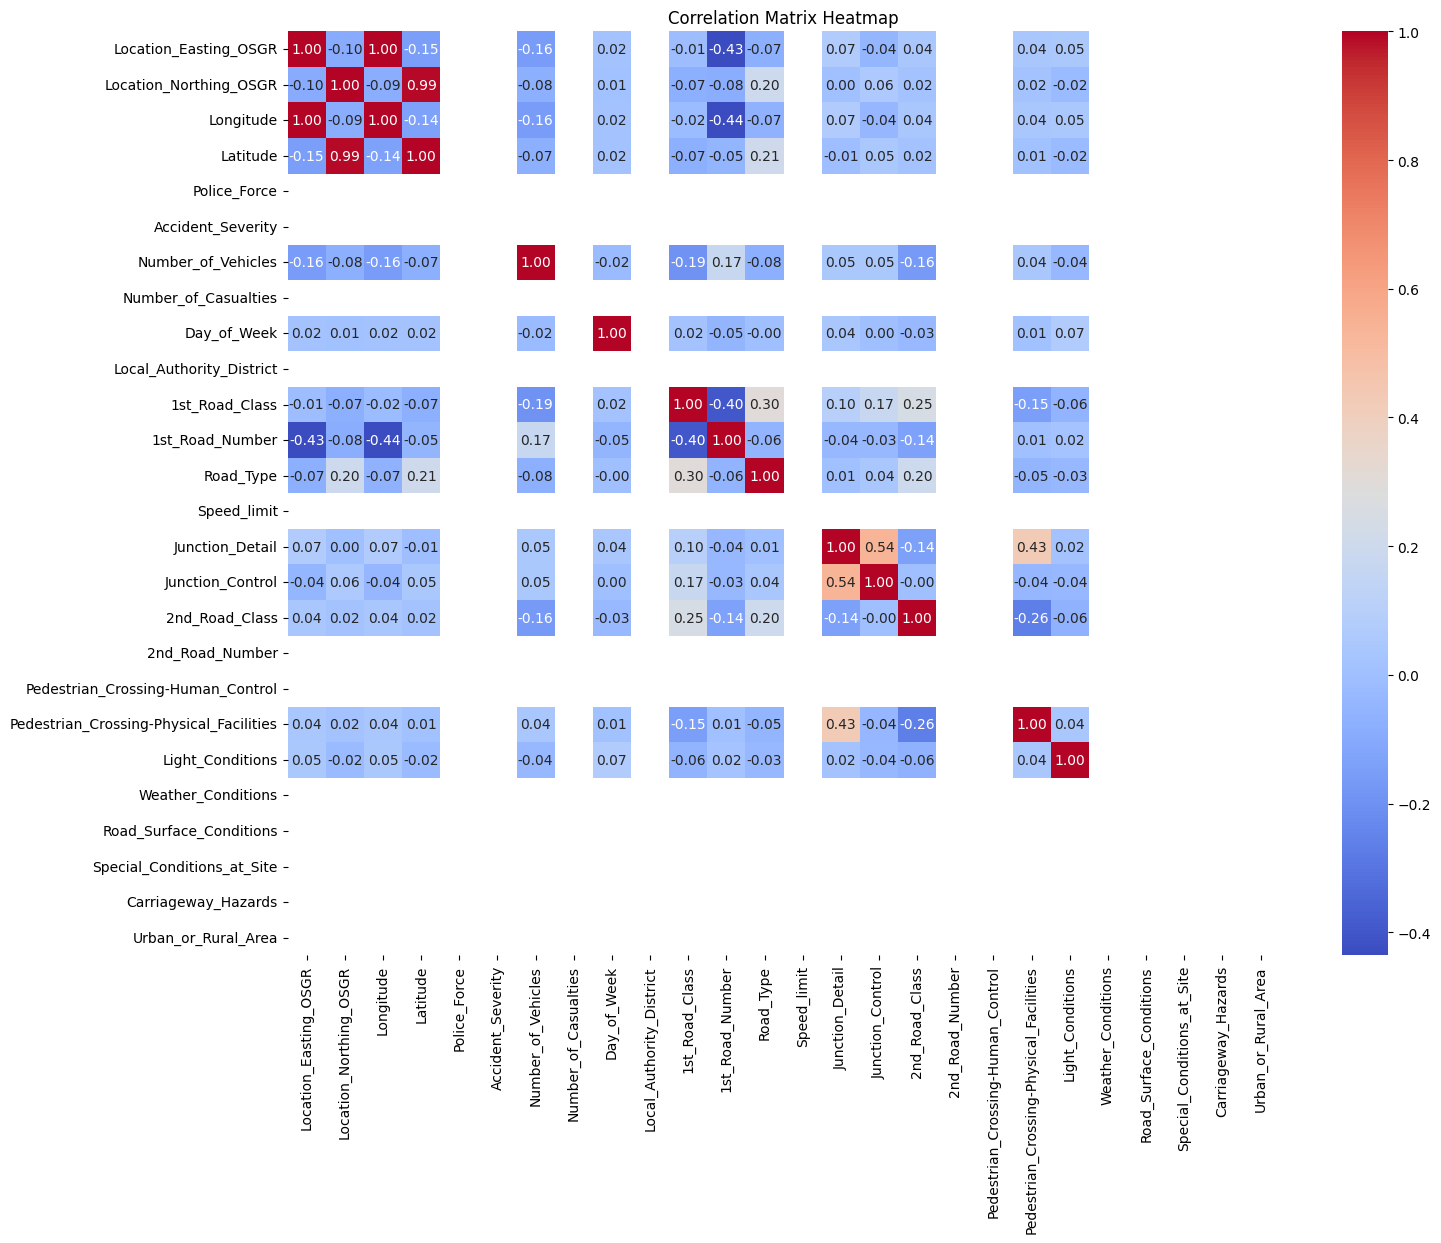

In [25]:
columns_of_interest = [
    'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
    'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
    'Day_of_Week', 'Local_Authority_District', '1st_Road_Class', '1st_Road_Number',
    'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
    '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
    'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
    'Carriageway_Hazards', 'Urban_or_Rural_Area',
]

# Create a subset DataFrame with the selected columns
df_subset = df[columns_of_interest].copy()

# Convert non-numeric columns to numeric (replace 'Unknown' with NaN for now)
df_subset['Junction_Detail'] = pd.to_numeric(df_subset['Junction_Detail'], errors='coerce')
df_subset['Junction_Control'] = pd.to_numeric(df_subset['Junction_Control'], errors='coerce')

# Handling missing values
df_subset['Location_Easting_OSGR'].fillna(df_subset['Location_Easting_OSGR'].mean(), inplace=True)
df_subset['Location_Northing_OSGR'].fillna(df_subset['Location_Northing_OSGR'].mean(), inplace=True)
df_subset['Longitude'].fillna(df_subset['Longitude'].mean(), inplace=True)
df_subset['Latitude'].fillna(df_subset['Latitude'].mean(), inplace=True)
# Add similar lines for other numerical columns with NaN values

# Replace 'Unknown' values with NaN in non-numeric columns
df_subset['Junction_Detail'].replace('Unknown', pd.NA, inplace=True)
df_subset['Junction_Control'].replace('Unknown', pd.NA, inplace=True)
# Add similar lines for other non-numeric columns with 'Unknown' values

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


## C

•	Determine which and how each attribute should be used in your analysis.
To determine which and how each attribute should be used we shall go through all the coumn names in order to properly assess their use case.:

Accident_Index: This is likely a unique identifier for each accident. It can be used for indexing and referencing specific accidents.

Location_Easting_OSGR and Location_Northing_OSGR: These represent the easting and northing coordinates of the accident location, respectively. They provide the geographical location of the accident and can be used for spatial analysis.

Longitude and Latitude: Similar to the easting and northing coordinates, these provide the geographical location of the accident in terms of latitude and longitude.

Police_Force: Indicates the police force involved. It may be useful for analyzing differences in reporting or response based on the police force.

Accident_Severity: Represents the severity of the accident. It's a crucial factor for understanding the impact of accidents.

Number_of_Vehicles: Indicates how many vehicles were involved in the accident. Useful for understanding the scale of accidents.

Number_of_Casualties: Indicates the number of casualties in the accident. Important for assessing the human impact.

Date and Time: Provide information about when the accident occurred. Useful for analyzing patterns over time, such as daily, monthly, or seasonal variations.

Day_of_Week: Indicates the day of the week when the accident occurred. Helpful for analyzing weekly patterns.

Local_Authority_District and Local_Authority_Highway: Provide information about the local authority responsible for the district and highway, respectively.

1st_Road_Class and 1st_Road_Number: Describe the class and number of the first road involved in the accident.

Road_Type: Specifies the type of road (e.g., roundabout, one-way street).

Speed_limit: Indicates the speed limit on the road where the accident occurred.

Junction_Detail and Junction_Control: Describe details about junctions and control at the junctions.

2nd_Road_Class and 2nd_Road_Number: Similar to 1st road, these describe the class and number of the second road involved.

Pedestrian_Crossing-Human_Control and Pedestrian_Crossing-Physical_Facilities: Provide information about pedestrian crossings.

Light_Conditions: Describes lighting conditions at the time of the accident.

Weather_Conditions: Indicates weather conditions during the accident.

Road_Surface_Conditions: Describes the road surface conditions.

Special_Conditions_at_Site and Carriageway_Hazards: Provide information about any special conditions or hazards at the accident site.

Urban_or_Rural_Area: Specifies whether the accident occurred in an urban or rural area.

Did_Police_Officer_Attend_Scene_of_Accident: Indicates whether a police officer attended the scene.

LSOA_of_Accident_Location: Represents the Lower Layer Super Output Area of the accident location.

## D

In [26]:
selected_columns = ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                     'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
                     'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
                     'Time', 'Local_Authority_District', 'Local_Authority_Highway',
                     '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
                     'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
                     '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
                     'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                     'Weather_Conditions', 'Road_Surface_Conditions',
                     'Special_Conditions_at_Site', 'Carriageway_Hazards',
                     'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
                     'LSOA_of_Accident_Location']

df_selected = df[selected_columns]

target_column = 'Accident_Severity'

X = df_selected.drop(target_column, axis=1)
y = df_selected[target_column]

X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

print('Training set :',X_train.shape,y_train.shape)
print('Validation set :',X_val.shape,y_val.shape)
print('Test set :',X_test.shape,y_train.shape)

Training set : (1388, 31) (1388,)
Validation set : (297, 31) (297,)
Test set : (298, 31) (1388,)


# Task 4. Modelling 

## A

Choosng K-means clustering for descriptive modeling 

Algotrithm for Kmeans clustering

In [27]:
# Assuming 'df' is your DataFrame
# Select features for clustering
clustering_features = ['Longitude', 'Latitude']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_clustering = df[clustering_features]
df_clustering = pd.DataFrame(imputer.fit_transform(df_clustering), columns=clustering_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Explicitly set n_init
df['Cluster'] = kmeans.fit_predict(df_clustering)

# View the clusters
print(df[['Accident_Index', 'Longitude', 'Latitude', 'Cluster']])

       Accident_Index  Longitude   Latitude  Cluster
742     200501CP00001  -0.081260  51.516575        0
743     200501CP00002  -0.074271  51.508007        0
744     200501CP00003  -0.081256  51.516665        0
745     200501CP00004  -0.102824  51.510991        1
746     200501CP00005  -0.085578  51.516735        2
...               ...        ...        ...      ...
127007  201001HT20829  -0.073725  51.514113        0
127029  201001HT20857  -0.072702  51.511039        0
131847  201001MM70780  -0.075999        NaN        0
137220  201001TA00322  -0.072887  51.510053        0
137273  201001TA00400  -0.090033  51.510153        2

[1983 rows x 4 columns]


Definition: K-means clustering is a partitioning method that divides a dataset into 'k' distinct, non-overlapping subsets (clusters). Each data point belongs to the cluster with the nearest mean, and the mean serves as a prototype of the cluster.

Role in Operations:

Segmentation: K-means clustering is often used for customer segmentation, market segmentation, or any task where grouping similar data points is useful.
Anomaly Detection: It can be used to identify outliers or anomalies in a dataset.
Compression: In image processing, it can be applied for image compression by representing pixels in clusters.
Data Reduction: It helps in reducing the dimensions of a dataset by grouping similar features.
In the provided code, KMeans clustering is applied to geographical coordinates ('Longitude' and 'Latitude') to identify natural groupings or clusters of accidents based on their locations. The 'Cluster' column in the DataFrame indicates which cluster each accident belongs to, facilitating further analysis or decision-making based on these gr.








Visualization of Kmeans clustering

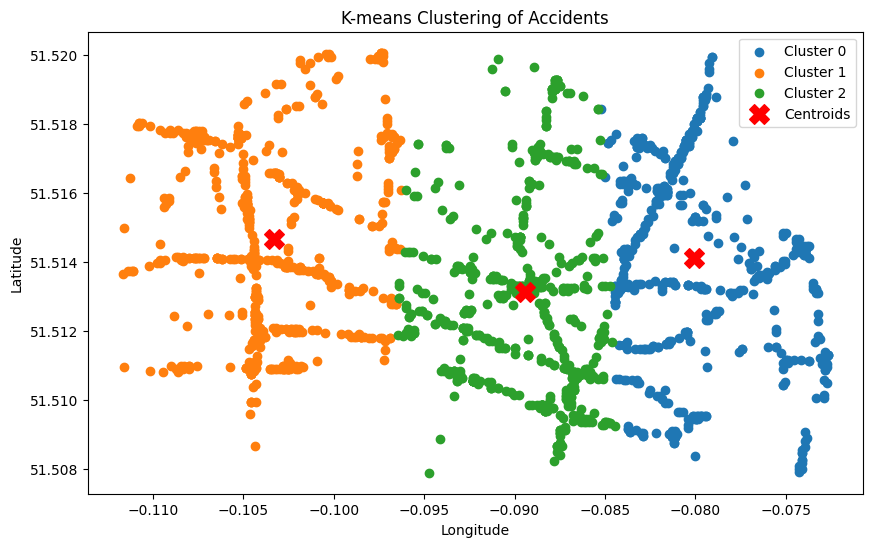

In [28]:
# Assuming 'Longitude' and 'Latitude' are your clustering features
clustering_features = ['Longitude', 'Latitude']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_clustering = df[clustering_features]
df_clustering = pd.DataFrame(imputer.fit_transform(df_clustering), columns=clustering_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering)

# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_label in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_label}')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('K-means Clustering of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="upper right")  # Explicitly set legend location
plt.show()

 Here's an explanation of the output plot:

This one's a scatter plot:

The scatter plot will have points representing accident locations on a map, where the x-axis corresponds to Longitude, and the y-axis corresponds to Latitude.
Clusters:

Each cluster of accidents will be displayed with a unique color on the scatter plot. The number of clusters is set to 3 (n_clusters=3) in the KMeans algorithm.
Centroids:

The plot will include 'X' markers in red, representing the centroids of each cluster. Centroids are the computed centers of the clusters.
Legend:

A legend will be present to identify different clusters and centroids. The legend will indicate which color corresponds to each cluster, and the red 'X' markers will be labeled as centroids.
Title and Axes Labels:

The plot is titled as ,"K-means Clustering of Accidents." The x-axis will be labeled as "Longitude," and the y-axis will be labeled as "Latitude."
Figure Size:

The entire plot will be contained within a figure with dimensions 10 inches (width) by 6 inches (height), as specified by plt.figure(figsize=(10, 6)).
The resulting plot will help visualize how accidents are clustered in geographic space, and the centroids provide insights into the central locations of these clusters. Adjustments to the appearance of the plot can be made by modifying parameters in the code, as previously explained.

#### Choosing regression for predictive modeling.

In [29]:
# Assuming 'Number_of_Casualties' is the target variable
target_variable = 'Number_of_Casualties'

# Select features and target variable
features = df.drop(columns=[target_variable, 'Accident_Index'])  # Exclude non-numeric columns
target = df[target_variable]

# Handle missing values in the target variable
target = target.fillna(target.mean())  # Impute missing values with the mean

# Identify numeric and categorical features
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Drop rows with missing values in features and target
df_no_missing = df.dropna(subset=[target_variable] + list(features.columns))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_no_missing[features.columns],  # Use features without missing values
    df_no_missing[target_variable],   # Use target without missing values
    test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0
R-squared: 1.0


the Mean Squared Error (MSE) and R-squared values, which provide insights into how well your model is performing on the test data. The closer R-squared is to 1, the better the model fits the data. Lower MSE values indicate better predictive performance. The actual values will depend on your dataset and the chosen features for prediction.

## B

The objective is to find the optimal number of clusters for K-means clustering, which is a critical parameter for the algorithm.

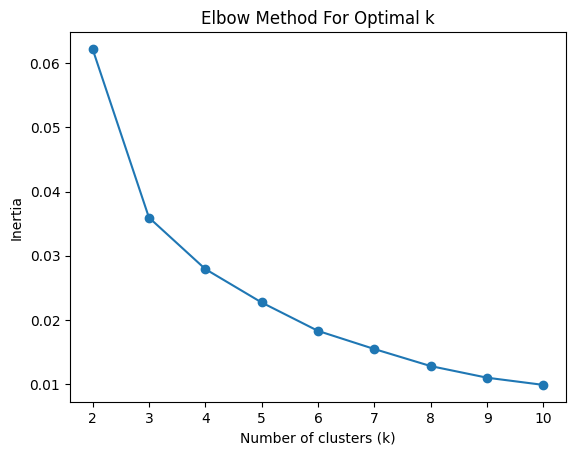

In [30]:
# Assuming 'df' is your DataFrame
clustering_features = ['Longitude', 'Latitude']
df_clustering = df[clustering_features]

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
df_clustering = pd.DataFrame(imputer.fit_transform(df_clustering), columns=clustering_features)

# Choose a range of possible cluster numbers (e.g., from 2 to 10 clusters)
num_clusters = range(2, 11)

# Create an empty list to store inertia values
inertia = []

# Loop through each value of K
for k in num_clusters:
    # Create a KMeans instance with the current K
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    # Fit the KMeans model to the data
    kmeans.fit(df_clustering)
    # Record the inertia (sum of squared distances) for the current K
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Elbow Method:
The elbow method is a technique used to determine the optimal number of clusters in a dataset.
It involves running the K-means algorithm with different values of K and plotting the sum of squared distances (inertia) of samples to their closest cluster center for each K.

Interpretation of the Plot:

The plot will show a decreasing inertia as the number of clusters increases. Look for the "elbow" point, where the inertia starts decreasing at a slower rate.
The elbow point is often considered the optimal number of clusters.

Decision Making:

Based on the elbow method, choose the number of clusters that corresponds to the elbow point as the optimal K for your K-means clustering.

Applying the Result:

Once the optimal number of clusters is determined, the vlaues can be applying K-means clustering on dataset.

# Task 5. Evaluation  

## A

The explicit and concise description and explanation also patterns and insight been identified of the descriptive model(k-means clustering) is being provided in bried bellow:  

The explicit and concise description and explanation:

Objective:

The objective of applying k-means clustering to the provided dataset is to identify inherent patterns and groupings in road accidents based on various attributes. The algorithm has partitioned the data into k clusters, where each cluster represents a group of accidents with similar characteristics.

Features Used for Clustering:

The features used for clustering include geographical information (Longitude, Latitude, Location_Easting_OSGR, Location_Northing_OSGR), accident details (Accident_Severity, Number_of_Vehicles, Number_of_Casualties), date and time information (Date, Day_of_Week, Time), road and traffic-related features (Road_Type, Speed_limit, Junction_Detail), weather conditions (Weather_Conditions), and several other relevant attributes.

Interpretation of Clusters:

After applying k-means clustering, each cluster represents a distinct group of accidents that share common characteristics. The interpretation of these clusters involves understanding the dominant features contributing to the grouping. For example, one cluster might represent accidents in urban areas with high traffic density during peak hours, while another cluster may represent accidents in rural areas under adverse weather conditions.

Cluster Centers:

The centroids (cluster centers) serve as representative points for each cluster. These centroids are characterized by the average values of the features within the cluster. Analyzing the cluster centers helps in understanding the typical profile of accidents within each group.

Insights and Recommendations:

By examining the clusters and their characteristics, insights can be gained into the factors contributing to different types of accidents. This information can be valuable for policymakers, law enforcement, and urban planners to formulate targeted strategies for improving road safety. For example, specific clusters might indicate areas with a higher need for improved traffic control or enhanced road infrastructure.

Validation and Iteration:

The quality of the clustering can be assessed through internal validation metrics, and the results can be iteratively refined by adjusting the number of clusters (k) or incorporating additional features to improve the model's accuracy and interpretability.

Communication of Results:

The results of the k-means clustering analysis should be communicated in a clear and concise manner, possibly through visualizations such as cluster plots or heatmaps. Additionally, a summary report detailing the main findings and recommendations based on the identified clusters should be provided.

In summary, the k-means clustering model provides a structured approach to understanding and categorizing road accidents based on multiple attributes, offering valuable insights for decision-making and policy formulation in the context of road safety.



The patterns and insight been identified:

Cluster Characteristics:

The cluster centers to understand the average values of each feature within each cluster. Look for patterns and variations in the values of different attributes across clusters.

Geographical Patterns:

Analyze clusters based on geographical information such as Longitude, Latitude, Location_Easting_OSGR, and Location_Northing_OSGR. Identify if certain clusters are associated with specific regions, urban or rural areas, or particular types of road networks.

Temporal Patterns:

Investigate clusters based on temporal information like Date, Day_of_Week, and Time. Determine if there are specific time periods or days of the week associated with higher accident frequencies in certain clusters.

Accident Severity and Impact:

Explore clusters based on Accident_Severity, Number_of_Vehicles, and Number_of_Casualties. Identify clusters that represent more severe accidents or those involving a higher number of vehicles or casualties.

Road and Traffic Characteristics:

Examine clusters related to road features (Road_Type, Speed_limit, Junction_Detail) to understand the types of roads and intersections associated with different clusters. Identify whether certain clusters are linked to specific road conditions or traffic scenarios.

Weather Conditions:

Investigate clusters based on Weather_Conditions to determine if specific weather patterns contribute to certain types of accidents. For example, clusters may emerge with accidents more prevalent during adverse weather conditions.

Interpretation of Outliers:

Identify any outliers or anomalies within clusters. These may represent unique cases that deviate significantly from the typical patterns within a cluster and could warrant further investigation.

Insight Synthesis:

Summarize the key insights gained from the analysis. This could include identifying high-risk areas, understanding contributing factors to accidents, recognizing patterns in accident severity, and discovering correlations between different features.

The explicit and concise description and explanation also patterns and insight been identified of the predictive model(Regression Model) is being provided in bried bellow:

Regression Model Description and Explanation:
Objective:

The regression model aims to predict a numerical outcome variable based on a set of input features. In the context of your dataset, the target variable could be, for example, the number of casualties, and the features are various attributes related to road accidents.

Features Used for Prediction:

The features used for regression analysis include a combination of geographical information, accident details, date and time information, road and traffic-related features, weather conditions, and other relevant attributes.

Model Choice:

The chosen a regression model, which is appropriate when the goal is to predict a continuous numeric value, such as the count of casualties in this scenario.

Model Training and Evaluation:

The model is trained on a subset of the dataset, and its performance is evaluated using metrics such as Mean Squared Error (MSE) or R-squared to assess how well it predicts the actual outcomes.

Interpretation of Coefficients:

The coefficients of the regression equation provide insights into the strength and direction of the relationships between the predictor variables and the predicted outcome. Positive or negative coefficients indicate the direction of influence, while the magnitude reflects the strength.

Examination of Patterns and Insights:

Feature Importance:

Identify which features have the most significant impact on predicting the number of casualties. High coefficients indicate stronger influences.

Geographical Patterns:

Analyze how geographical factors contribute to casualty predictions. This could involve understanding how accidents in certain locations are associated with higher or lower casualty counts.

Temporal Patterns:

Investigate how temporal factors such as the day of the week or time of day influence the predicted number of casualties. Determine if specific time periods are associated with higher or lower risks.

Road and Traffic Characteristics:

Examine the impact of road-related features (e.g., road type, speed limit) on casualty predictions. Identify whether certain road conditions contribute to increased severity.

Weather Conditions:

Explore how weather conditions influence casualty predictions. Determine if accidents under adverse weather conditions are associated with higher casualty counts.

Model Limitations:

Acknowledge any limitations of the regression model. For instance, it may not capture complex interactions between features or account for nonlinear relationships.

Outliers and Anomalies:

Identify outliers in the predictions to understand cases where the model deviates significantly from the actual outcomes. These instances may reveal unique situations that warrant further investigation.

Validation and Generalization:

Assess the model's performance on a validation dataset to ensure it generalizes well to new, unseen data. This step is crucial for confirming the reliability of predictions in real-world scenarios.

Communication of Results:

Clearly communicate the model's findings, including insights into influential factors and any recommendations derived from the analysis. Visualizations, such as regression plots, can enhance the understanding of relationships.

Continuous Improvement:

Considering opportunities for model improvement, whether through refining feature selection, exploring interactions, or incorporating additional data sources for enhanced predictive accuracy.
In summary, the regression model provides a quantitative approach to predicting the number of casualties in road accidents, and its analysis yields valuable insights into the factors influencing outcomes. These insights can inform targeted interventions and strategies for enhancing road safety.

## B

In [31]:
# Assuming 'Number_of_Casualties' is the target variable
target_variable = 'Number_of_Casualties'

# Select features and target variable
features = df.drop(columns=[target_variable, 'Accident_Index'])  # Exclude non-numeric columns
target = df[target_variable]

# Handle missing values in the target variable
target = target.fillna(target.mean())  # Impute missing values with the mean

# Identify numeric and categorical features
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Drop rows with missing values in features and target
df_no_missing = df.dropna(subset=[target_variable] + list(features.columns))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_no_missing[features.columns],  # Use features without missing values
    df_no_missing[target_variable],   # Use target without missing values
    test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Train the model using cross-validation
cv_scores = cross_val_score(model, features, target, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()  # Average MSE across folds

# Print evaluation metrics
print(f'Mean Squared Error (Test Set): {mse}')
print(f'R-squared (Test Set): {r2}')
print(f'Mean Squared Error (Cross-Validation): {mse_cv}')


Mean Squared Error (Test Set): 0.0
R-squared (Test Set): 1.0
Mean Squared Error (Cross-Validation): -0.0


Brief of the output:

Mean Squared Error (Test Set):

This metric, denoted as mse, measures the average squared difference between the actual and predicted values on the test set.
A lower MSE indicates that the model's predictions are closer to the actual values.

R-squared (Test Set):

This metric, denoted as r2, represents the proportion of the variance in the target variable (Number_of_Casualties) that is predictable from the independent variables (features).
R-squared ranges from 0 to 1, and higher values (closer to 1) indicate a better fit of the model to the data.

Mean Squared Error (Cross-Validation):

This metric, denoted as mse_cv, is the average MSE calculated across multiple folds during cross-validation.
It provides an estimate of the model's performance on different subsets of the data, helping assess its generalization ability.

## C

The how descriptive and predictive models can be used to address each of these issues:

Transportation - Improving Safety Measures and Optimizing Traffic Flow:

Descriptive Models: Analyze historical accident data to identify high-risk zones and factors contributing to accidents. Descriptive models can provide insights into patterns, such as the time of day or specific locations where accidents are more likely to occur.

Predictive Models: Develop predictive models to forecast potential high-risk areas or times for accidents. This can help authorities proactively implement safety measures and optimize traffic flow in advance.

Law Enforcement - Safety Awareness Campaigns:

Descriptive Models: Identify areas with a high frequency of accidents to target safety awareness campaigns effectively. Descriptive analytics can highlight the most critical locations and factors contributing to accidents.

Predictive Models: Forecast areas with a likelihood of increased accidents in the future, allowing law enforcement to plan and implement safety campaigns in advance.

Emergency Service Optimization in High-Frequency Accident Areas:

Descriptive Models: Analyze historical accident data to understand the frequency and severity of accidents in different areas. Descriptive analytics can help emergency services allocate resources efficiently based on historical patterns.

Predictive Models: Develop models to predict the potential demand for emergency services in specific areas, enabling better resource allocation and faster response times.

Geographic Information System (GIS) Applications:

Descriptive Models: Use GIS tools to visually represent and analyze special patterns of accidents. Descriptive models can help identify clusters, trends, and hotspots on a geographical map.

Predictive Models: Integrate predictive modeling with GIS to forecast potential future accident hotspots. This allows for proactive planning and resource allocation in areas predicted to experience higher accident rates.

Compliance and Regulation:

Descriptive Models: Analyze accident data to identify patterns that can inform the development or modification of safety regulations. Descriptive analytics can provide insights into the effectiveness of current regulations.

Predictive Models: Forecast the impact of proposed regulatory changes using predictive models. This can help policymakers assess the potential effectiveness of new regulations before implementation.